In [1]:
import pandas as pd
import re

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text.lower()

def find_match(sentence, word_list):
    find_in_words = word_tokenize(sentence.lower())
    r = set(word_list).intersection(find_in_words)
    return list(r)

synonyms = ['eve', 'mary', 'maryam', 'female', 'woman','women','she','her','mother','sister','daughter','wife','aunt', 
            'queen', 'lady', 'fairy','virgin','womans','womens','hers','mothers',
            'sisters','daughters','wives','wifes','aunts', 'queens', 'ladys',
             'ladies', 'fairies','fairys', 'fairy','virgins']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# If you have cloned the project, you can read this data locally:
verses = pd.read_json('../../data/source/verses.json')
# else use the following:
# verses = pd.read_json('https://projectq.io/data/source/verses.json')

verses = verses[verses.chapter==4]
verses

,id,chapter,verse,Sahih_International,Yusuf_Ali,Shakir,Muhammad_Sarwar,Mohsin_Khan
493,494,4,1,"O mankind, fear your Lord, who created you fro...","O mankind! reverence your Guardian-Lord, who c...",O people! be careful of (your duty to) your Lo...,"People, have fear of your Lord who has created...","O mankind! Be dutiful to your Lord, Who create..."
494,495,4,2,And give to the orphans their properties and d...,To orphans restore their property (When they r...,"And give to the orphans their property, and do...",Give to the orphans their property. Do not exc...,And give unto orphans their property and do no...
495,496,4,3,And if you fear that you will not deal justly ...,If ye fear that ye shall not be able to deal j...,And if you fear that you cannot act equitably ...,"With respect to marrying widows, if you are af...",And if you fear that you shall not be able to ...
496,497,4,4,And give the women [upon marriage] their [brid...,And give the women (on marriage) their dower a...,"And give women their dowries as a free gift, b...",Pay the women their dowry as though it were a ...,And give to the women (whom you marry) their M...
497,498,4,5,"And do not give the weak-minded your property,...",To those weak of understanding Make not over y...,And do not give away your property which Allah...,Do not give to people weak of understanding yo...,And give not unto the foolish your property wh...
...,...,...,...,...,...,...,...,...
664,665,4,172,Never would the Messiah disdain to be a servan...,Christ disdaineth nor to serve and worship All...,The Messiah does by no means disdain that he s...,Jesus never disdained the worship of God nor d...,The Messiah will never be proud to reject to b...
665,666,4,173,And as for those who believed and did righteou...,But to those who believe and do deeds of right...,"Then as for those who believe and do good, He ...",The righteously striving believers will receiv...,"So, as for those who believed (in the Oneness ..."
666,667,4,174,"O mankind, there has come to you a conclusive ...",O mankind! verily there hath come to you a con...,O people! surely there has come to you manifes...,"Mankind, an undeniable proof has certainly com...","O mankind! Verily, there has come to you a con..."
667,668,4,175,So those who believe in Allah and hold fast to...,"Then those who believe in Allah, and hold fast...",Then as for those who believe in Allah and hol...,Those who believe in God and seek His protecti...,"So, as for those who believed in Allah and hel..."


In [3]:
# extract name of translators
translators = [c for c in verses.keys() if c not in ['id','chapter','verse']]
translators

['Sahih_International',
 'Yusuf_Ali',
 'Shakir',
 'Muhammad_Sarwar',
 'Mohsin_Khan']

In [4]:
for trans in translators:
    verses[trans+'_tag'] = verses[trans].apply(find_match, word_list=synonyms)
    verses[trans+'_found'] = verses.apply(lambda x: False if x[trans+'_tag'] == [] else True,axis=1) 

verses

,id,chapter,verse,Sahih_International,Yusuf_Ali,Shakir,Muhammad_Sarwar,Mohsin_Khan,Sahih_International_tag,Sahih_International_found,Yusuf_Ali_tag,Yusuf_Ali_found,Shakir_tag,Shakir_found,Muhammad_Sarwar_tag,Muhammad_Sarwar_found,Mohsin_Khan_tag,Mohsin_Khan_found
493,494,4,1,"O mankind, fear your Lord, who created you fro...","O mankind! reverence your Guardian-Lord, who c...",O people! be careful of (your duty to) your Lo...,"People, have fear of your Lord who has created...","O mankind! Be dutiful to your Lord, Who create...",[women],True,[women],True,[women],True,[women],True,"[women, eve, wife]",True
494,495,4,2,And give to the orphans their properties and d...,To orphans restore their property (When they r...,"And give to the orphans their property, and do...",Give to the orphans their property. Do not exc...,And give unto orphans their property and do no...,[],False,[],False,[],False,[],False,[],False
495,496,4,3,And if you fear that you will not deal justly ...,If ye fear that ye shall not be able to deal j...,And if you fear that you cannot act equitably ...,"With respect to marrying widows, if you are af...",And if you fear that you shall not be able to ...,[women],True,[women],True,[women],True,"[her, woman, wife]",True,[women],True
496,497,4,4,And give the women [upon marriage] their [brid...,And give the women (on marriage) their dower a...,"And give women their dowries as a free gift, b...",Pay the women their dowry as though it were a ...,And give to the women (whom you marry) their M...,[women],True,[women],True,[women],True,[women],True,"[women, wife]",True
497,498,4,5,"And do not give the weak-minded your property,...",To those weak of understanding Make not over y...,And do not give away your property which Allah...,Do not give to people weak of understanding yo...,And give not unto the foolish your property wh...,[],False,[],False,[],False,[],False,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,665,4,172,Never would the Messiah disdain to be a servan...,Christ disdaineth nor to serve and worship All...,The Messiah does by no means disdain that he s...,Jesus never disdained the worship of God nor d...,The Messiah will never be proud to reject to b...,[],False,[],False,[],False,[],False,[],False
665,666,4,173,And as for those who believed and did righteou...,But to those who believe and do deeds of right...,"Then as for those who believe and do good, He ...",The righteously striving believers will receiv...,"So, as for those who believed (in the Oneness ...",[],False,[],False,[],False,[],False,[],False
666,667,4,174,"O mankind, there has come to you a conclusive ...",O mankind! verily there hath come to you a con...,O people! surely there has come to you manifes...,"Mankind, an undeniable proof has certainly com...","O mankind! Verily, there has come to you a con...",[],False,[],False,[],False,[],False,[],False
667,668,4,175,So those who believe in Allah and hold fast to...,"Then those who believe in Allah, and hold fast...",Then as for those who believe in Allah and hol...,Those who believe in God and seek His protecti...,"So, as for those who believed in Allah and hel...",[],False,[],False,[],False,[],False,[],False


In [5]:
match_cols = [c for c in verses.keys() if c[-5:] == "found"]
verses['total_found'] = verses[match_cols].sum(axis=1)

verses[match_cols].sum()

Sahih_International_found    28
Yusuf_Ali_found              28
Shakir_found                 23
Muhammad_Sarwar_found        25
Mohsin_Khan_found            32
dtype: int64

In [6]:
all_true = (verses[match_cols]==True).all(axis="columns")
at_least_one_true = (verses[match_cols]==True).any(axis="columns")

# Exclude where all are true but include where at least one is True
exceptions = verses[ ~(all_true) & (at_least_one_true) ]
exceptions[exceptions.total_found<3]

,id,chapter,verse,Sahih_International,Yusuf_Ali,Shakir,Muhammad_Sarwar,Mohsin_Khan,Sahih_International_tag,Sahih_International_found,Yusuf_Ali_tag,Yusuf_Ali_found,Shakir_tag,Shakir_found,Muhammad_Sarwar_tag,Muhammad_Sarwar_found,Mohsin_Khan_tag,Mohsin_Khan_found,total_found
508,509,4,16,"And the two who commit it among you, dishonor ...","If two men among you are guilty of lewdness, p...",And as for the two who are guilty of indecency...,"If any two people commit fornication, punish t...",And the two persons (man and woman) among you ...,[],False,[],False,[],False,[],False,[woman],True,1
520,521,4,28,And Allah wants to lighten for you [your diffi...,Allah doth wish to lighten your (difficulties)...,Allah desires that He should make light your b...,God wants to relieve you of your burden; all h...,Allah wishes to lighten (the burden) for you; ...,[],False,[],False,[],False,[],False,[woman],True,1
549,550,4,57,But those who believe and do righteous deeds -...,But those who believe and do deeds of righteou...,And (as for) those who believe and do good dee...,We will admit the righteously striving believe...,But those who believe (in the Oneness of Allah...,[],False,[],False,[],False,[],False,[wives],True,1
651,652,4,159,And there is none from the People of the Scrip...,And there is none of the People of the Book bu...,And there is not one of the followers of the B...,There will be no one among the People of the B...,And there is none of the people of the Scriptu...,[],False,[],False,[],False,[],False,"[maryam, mary]",True,1


In [7]:
# Reviewing the exceptions:
# 4:159 NO: used 'Mary' to refernce Jesus (son of Mary)
# 4:57 YES: this is a controversial verse, we will flag this 
# 4:28 NO: used as reference to man
# 4:16 YES: this is a controversial verse, we will flag this 

verses['women_mentioned'] = verses['total_found'].apply(lambda x: True if x > 2 else False)
verses['controversial'] = False

verses.loc[verses.verse==57, 'women_mentioned'] = True
verses.loc[verses.verse==57, 'controversial'] = True

verses.loc[verses.verse==16, 'women_mentioned'] = True
verses.loc[verses.verse==16, 'controversial'] = True

In [8]:
verses.groupby('women_mentioned').size()

women_mentioned
False    146
True      30
dtype: int64

<AxesSubplot:title={'center':'Women Mentioned'}, ylabel='verse'>

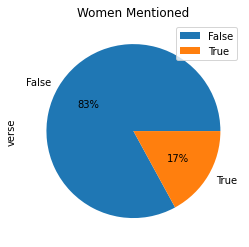

In [9]:
verses.groupby('women_mentioned').count().plot(kind='pie', y='verse', autopct='%1.0f%%', title='Women Mentioned')

In [10]:
verses[verses.women_mentioned==True]

,id,chapter,verse,Sahih_International,Yusuf_Ali,Shakir,Muhammad_Sarwar,Mohsin_Khan,Sahih_International_tag,Sahih_International_found,...,Yusuf_Ali_found,Shakir_tag,Shakir_found,Muhammad_Sarwar_tag,Muhammad_Sarwar_found,Mohsin_Khan_tag,Mohsin_Khan_found,total_found,women_mentioned,controversial
493,494,4,1,"O mankind, fear your Lord, who created you fro...","O mankind! reverence your Guardian-Lord, who c...",O people! be careful of (your duty to) your Lo...,"People, have fear of your Lord who has created...","O mankind! Be dutiful to your Lord, Who create...",[women],True,...,True,[women],True,[women],True,"[women, eve, wife]",True,5,True,False
495,496,4,3,And if you fear that you will not deal justly ...,If ye fear that ye shall not be able to deal j...,And if you fear that you cannot act equitably ...,"With respect to marrying widows, if you are af...",And if you fear that you shall not be able to ...,[women],True,...,True,[women],True,"[her, woman, wife]",True,[women],True,5,True,False
496,497,4,4,And give the women [upon marriage] their [brid...,And give the women (on marriage) their dower a...,"And give women their dowries as a free gift, b...",Pay the women their dowry as though it were a ...,And give to the women (whom you marry) their M...,[women],True,...,True,[women],True,[women],True,"[women, wife]",True,5,True,False
499,500,4,7,For men is a share of what the parents and clo...,From what is left by parents and those nearest...,Men shall have a portion of what the parents a...,Male and female are entitled to their legal sh...,There is a share for men and a share for women...,[women],True,...,True,[women],True,[female],True,[women],True,5,True,False
503,504,4,11,Allah instructs you concerning your children: ...,Allah (thus) directs you as regards your Child...,Allah enjoins you concerning your children: Th...,This is a commandment from your Lord: After th...,Allah commands you as regards your children's ...,"[daughters, her, sisters, mother]",True,...,True,"[mother, she]",True,"[female, mother, she]",True,"[daughters, her, sisters, mother]",True,5,True,False
504,505,4,12,And for you is half of what your wives leave i...,"In what your wives leave, your share is a half...",And you shall have half of what your wives lea...,If your wives die without any surviving childr...,"In that which your wives leave, your share is ...","[sister, wives, woman]",True,...,True,"[sister, wives, woman, she]",True,"[female, sister, wives]",True,"[sister, wives, woman, she]",True,5,True,False
507,508,4,15,Those who commit unlawful sexual intercourse o...,"If any of your women are guilty of lewdness, T...",And as for those who are guilty of an indecenc...,"Those of your women who commit fornication, le...",And those of your women who commit illegal sex...,[women],True,...,True,[women],True,[women],True,[women],True,5,True,False
508,509,4,16,"And the two who commit it among you, dishonor ...","If two men among you are guilty of lewdness, p...",And as for the two who are guilty of indecency...,"If any two people commit fornication, punish t...",And the two persons (man and woman) among you ...,[],False,...,False,[],False,[],False,[woman],True,1,True,True
511,512,4,19,"O you who have believed, it is not lawful for ...",O ye who believe! Ye are forbidden to inherit ...,O you who believe! it is not lawful for you th...,"Believers, it is not lawful for you to inherit...",O you who believe! You are forbidden to inheri...,[women],True,...,True,[women],True,"[women, wives]",True,[women],True,5,True,False
512,513,4,20,But if you want to replace one wife with anoth...,But if ye decide to take one wife in place of ...,And if you wish to have (one) wife in place of...,If you want to divorce a woman so that you can...,But if you intend to replace a wife by another...,[wife],True,...,True,"[her, wife]",True,[woman],True,[wife],True,5,True,False


In [11]:
verses.to_json('../../data/an_nisa_initial_tagging.json', orient="records")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bde230b6-0e7f-496d-9e8b-b7ffaeec8999' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>